# Documents

For OIH documents will scope more than datasets.   Documents will include maps, reports,
guidance and other creative works.  Due to this OIH will focus on a generic example
of [schema.org/CreativeWork](https://schema.org/CreativeWork) and then provide examples
for more focused creative work examples.

These will include initially;

* [https://schema.org/Map](https://schema.org/Map)
* [https://schema.org/Dataset](https://schema.org/Dataset) with guidance here likely to
  recommend following the [Science on Schema](https://science-on-schema.org) guidance under
  development at ESIP.
* [https://schema.org/Course](https://schema.org/Course)
  
Items not scoped above can be represented as a generic CreativeWork at this time. 
An example of a minimal description of such a resource would look like the following

[Load in JSON-LD Playground](https://json-ld.org/playground/#startTab=tab-expanded&json-ld=https://raw.githubusercontent.com/fils/odis-arch/master/schema/docs/graphs/creativework.json)

[Load in Structured Data Testing Tool](https://search.google.com/structured-data/testing-tool#url=https://raw.githubusercontent.com/fils/odis-arch/master/schema/docs/graphs/creativework.json)

```{literalinclude} ./graphs/creativework.json
:linenos:
```

In [2]:
import graphviz
# from conceptnet5.uri import join_uri, split_uri
API_ROOT = 'http://api.conceptnet.io'


def short_name(value, max_length=40):
    """
    Convert an RDF value (given as a dictionary) to a reasonable label.
    """
    if value['type'] == 'blank node':
        return '_'
    elif value['type'] == 'IRI':    
        url = value['value']
        if '#' in url:
            # Show just the fragment of URLs with a fragment
            # (it's probably a property name)
            return url.split('#')[-1]

        # Give URLs relative to the root of our API
        if url.startswith(API_ROOT):
            short_url = url[len(API_ROOT):]
            # If the URL is too long, hide it
            if len(short_url) > max_length:
                pieces = split_uri(short_url)
                return join_uri(pieces[0], '...')
            else:
                return short_url
        else:
            return url.split('://')[-1]
    else:
        # Put literal values in quotes
        text = value['value'].replace(':', '')
        if len(text) > max_length:
            text = text[:max_length] + '...'
        return '"{}"'.format(text)

    
def show_graph(url, size=10):
    """
    Show the graph structure of a ConceptNet API response.
    """
    rdf = jsonld.normalize(url)['@default']
    graph = graphviz.Digraph(
        strict=False, graph_attr={'size': str(size), 'rankdir': 'LR'}
    )
    for edge in rdf:
        subj = short_name(edge['subject'])
        obj = short_name(edge['object'])
        pred = short_name(edge['predicate'])
        if subj and obj and pred:
            # Apply different styles to the nodes based on whether they're
            # literals, ConceptNet URLs, or other URLs
            if obj.startswith('"'):
                # Literal values
                graph.node(obj, penwidth='0')
            elif obj.startswith('/'):
                # ConceptNet nodes
                graph.node(obj, style='filled', fillcolor="#ddeeff")
            else:
                # Other URLs
                graph.node(obj, color="#558855")
            graph.edge(subj, obj, label=pred)
    
    return graph

In [4]:
from pyld import jsonld
import json

name = 'Data Set Name one' #@param {type:"string"}
sdotype = 'http://schema.org/Dataset' #@param ["http://schema.org/Dataset", "http://schema.org/DataCatalog"]
description = 'Descriptive text of the dataset.' #@param {type:"string"}
url = 'http://foo.org/data/distribution' #@param {type:"string"}
version = 'version' #@param {type:"string"}
license = 'CC-BY-4.0' #@param ["CC-BY-4.0", "CC-0"]
keywords = 'geochemistry, Earth System Modeling, climate change' #@param {type:"string"}


doc = {}
doc["https://schema.org/name"] = name
doc["@type"] = sdotype
doc["@id"] = "http://cooldata.io/id/doc/1"
doc["https://schema.org/description"] = description
doc["https://schema.org/url"] =  url
doc["https://schema.org/version"] =  version
doc["https://schema.org/license"] =  license

# parse comma seperated keywords, clean white spaces
k = keywords.split(",")
kp = []
for i in k:
  j = i.strip()
  kp.append(j)

doc["http://schema.org/keywords"] =  kp


context = {
    "@vocab": "https://schema.org/",
}

# compact a document according to a particular context
# see: http://json-ld.org/spec/latest/json-ld/#compacted-document-form
compacted = jsonld.compact(doc, context)

jd = json.dumps(compacted, indent=4)
print(jd)

{
    "@context": {
        "@vocab": "https://schema.org/"
    },
    "@id": "http://cooldata.io/id/doc/1",
    "@type": "http://schema.org/Dataset",
    "http://schema.org/keywords": [
        "geochemistry",
        "Earth System Modeling",
        "climate change"
    ],
    "description": "Descriptive text of the dataset.",
    "license": "CC-BY-4.0",
    "name": "Data Set Name one",
    "url": "http://foo.org/data/distribution",
    "version": "version"
}


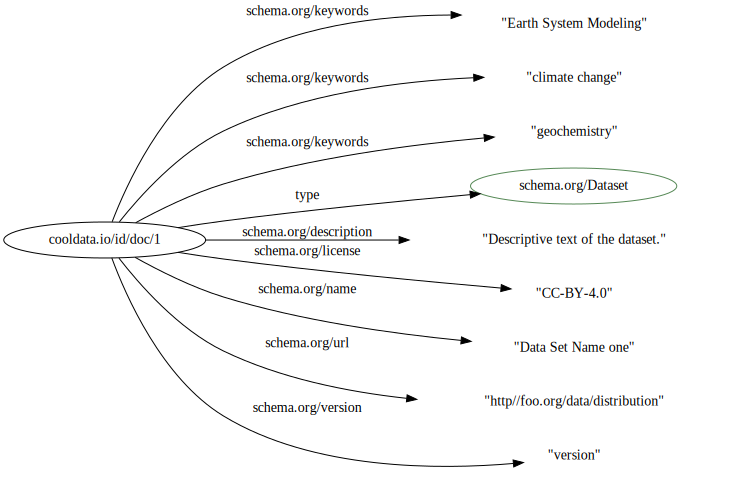

In [5]:
show_graph(doc, size=30)

## Framing

Understanding Framing is not a first order concern.   However, understanding it and what it does can help you to think about how your data graph will be used. 

Let's make a frame that allows us to view only the elements of the JSON-LD data graph that we are interested in.   In this case let's target the keywords.

{'@context': {'@vocab': 'http://schema.org/'}, '@id': 'http://cooldata.io/id/doc/1', '@type': 'Dataset', 'keywords': ['geochemistry', 'Earth System Modeling', 'climate change']}


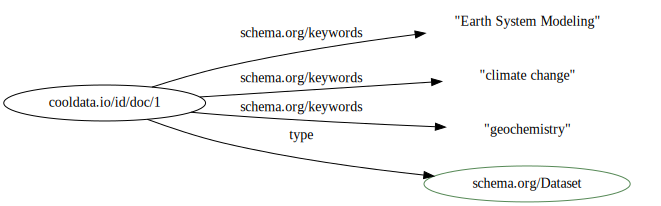

In [6]:
urlf = "https://raw.githubusercontent.com/ESIPFed/science-on-schema.org/master/examples/dataset/minimal.jsonld"

frame = {
  "@context": {"@vocab": "http://schema.org/"},
  "@explicit": "true",
   "@type":     "Dataset",
  "keywords": "",
}


framed = jsonld.frame(doc, frame)
print(framed)

show_graph(framed)

In [7]:
with open('./graphs/doc.json', 'r') as file:
    docstring = file.read()

docjson = json.loads(docstring) 


FileNotFoundError: [Errno 2] No such file or directory: './graphs/doc.json'

In [ ]:
with open('/content/doc.json', 'r') as file:
    docstring = file.read()

docjson = json.loads(docstring) 


## About
The code below invokes pySHACL on some data and shape graphs out of GitHub. Note, we could edit these 
local to this notebook too. The human output is a bit hard to read since some of the encoding is off.

It might actually work to use the graph output and route it through the graph package and into Pandas too. 
It might let us parse and present the results a bit better.

The imaage below is just a test of putting images into this document.  We can also upload and associate 
a document with the notebook and use it locally too.


In [8]:
from pyshacl import validate
import json
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import requests
from rdflib import Graph, plugin
from rdflib.serializer import Serializer

from bs4 import BeautifulSoup
import urllib.request

dg = 'https://raw.githubusercontent.com/ESIPFed/science-on-schema.org/master/examples/dataset/minimal.jsonld'
sg = 'https://raw.githubusercontent.com/geoschemas-org/geoshapes/master/shapegraphs/googleRecommendedCoverageCheck.ttl'

s = rdflib.Graph()
sr = s.parse(sg, format="ttl")
d = rdflib.Graph()
dr = d.parse(dg, format="json-ld")

conforms, v_graph, v_text = validate(dr, shacl_graph=sr,
  data_graph_format="json-ld",
  shacl_graph_format="ttl",
  inference='none', debug=False,
  serialize_report_graph=False)
        
print('{} {}'.format(conforms, v_text))

True Validation Report
Conforms: True

